In [2]:
import os
import sys
import pathlib
import math
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline 

import numpy as np
import pandas as pd

from IPython.display import clear_output
from datetime import datetime
import re

import pingouin as pg
from sklearn import preprocessing

In [2]:
ids = os.listdir("E:/UG4data/Smile")
ids.remove("PRB002")
ids.remove("PRB111")
long_ids = [f[:-14] for f in os.listdir(f"E:/UG4data/NHS_processed")]
CAT_id = ['PRB003', 'PRB004', 'PRB006', 'PRB007', 'PRB102', 'PRB103']

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
NEW_ACTIVITY_DESCRIPTIONS = {
    0: "Ascending stairs",
    1: 'Cycling',
    2: 'Descending stairs',
    3: 'Lying on back',
    4: 'Lying on left side',
    5: 'Lying on right side',
    6: 'Lying on stomach',
    7: 'Movement',
    8: 'Not worn',
    9: 'Running',
    10: 'Shuffling',
    11: 'Sitting/Standing',
    12: 'Walking'
}
stationary_activities = [3, 4, 5, 6, 11]

ACTIVITY_COLOR = {
    'Ascending stairs': "orchid",
    'Cycling': "darkviolet",
    'Descending stairs': "hotpink",
    'Lying on back': "olivedrab",
    'Lying on left side': "limegreen",
    'Lying on right side': "mediumseagreen",
    'Lying on stomach': "lightseagreen",
    'Movement': "indianred",
    'Not worn': "silver",
    'Running': "red",
    'Shuffling': "chocolate",
    'Sitting/Standing': "royalblue",
    'Walking': "orange" 
}

## CAT sorce: sleeplessness

In [7]:
df_CAT_agg = pd.DataFrame()
for id in os.listdir(f"E:/UG4data/Smile/"):
    path = f"E:/UG4data/Smile/{id}/Diary/"
    if os.path.exists(path):
        for file in os.listdir(path):
            file_path = path + file
            df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col=["timestamp"], )
            df.index = pd.to_datetime(df.index, unit='s')
            df = df.drop(["diary_id"], axis=1)
            print(id)
            display(df)

PRB003


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2021-08-19 17:42:05,1,1,1,1,0,0,0,1,5,NaN,NaN
2021-08-20 21:06:33,1,1,1,1,0,0,5,3,12,NaN,NaN
2021-08-21 20:43:33,1,1,0,1,0,0,0,1,4,NaN,NaN
2021-08-22 22:38:41,2,2,0,2,1,0,0,2,9,NaN,NaN
2021-08-23 22:18:53,1,1,1,1,1,1,0,1,7,NaN,NaN
2021-08-25 12:43:00,1,1,1,1,1,1,0,3,9,NaN,NaN
2021-08-26 22:27:55,1,1,2,1,0,0,0,2,7,NaN,NaN
2021-08-27 19:42:16,1,1,2,1,0,0,0,2,7,NaN,NaN
2021-08-28 11:41:44,1,1,1,1,0,0,0,2,6,NaN,NaN


PRB004


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2021-10-13 14:52:15,5,3,2,4,3,3,3,4,27,NaN,NaN
2021-10-14 14:17:55,3,3,3,4,4,4,4,4,29,NaN,NaN


PRB005


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2022-04-04 09:22:14,5,3,3,3,2,1,3,3,23,NaN,NaN
2022-04-21 17:27:22,2,2,1,2,2,0,2,2,13,NaN,NaN


PRB006


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2022-04-25 10:03:29,4,4,3,5,3,0,0,4,23,NaN,NaN
2022-04-28 15:34:13,4,0,4,3,4,2,2,4,23,NaN,NaN
2022-04-29 15:24:08,4,3,4,5,4,4,3,3,30,NaN,NaN
2022-05-03 16:13:25,3,4,5,4,4,0,0,4,24,NaN,NaN
2022-05-09 09:28:13,4,3,5,5,4,4,5,4,34,NaN,NaN
2022-05-13 15:50:35,4,0,3,5,3,1,3,3,22,NaN,NaN
2022-05-14 17:38:07,3,0,4,4,4,4,3,3,25,NaN,NaN
2022-05-16 15:34:32,3,3,3,4,3,1,3,4,24,NaN,NaN
2022-05-17 08:14:49,3,4,4,4,3,4,3,3,28,NaN,NaN


PRB007


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2022-07-05 16:46:19,3,3,1,5,3,3,3,3,24,NaN,NaN
2022-07-07 16:18:28,3,3,1,5,2,3,3,2,22,NaN,NaN
2022-07-11 15:40:34,3,3,1,5,3,2,2,2,21,NaN,NaN
2022-07-13 15:26:51,2,2,2,5,3,2,3,3,22,NaN,NaN
2022-07-15 11:13:14,1,1,1,5,3,2,3,3,19,NaN,NaN
2022-07-20 17:13:42,2,2,2,5,2,2,3,3,21,NaN,NaN
2022-07-23 06:28:18,2,2,2,5,2,2,2,3,20,NaN,NaN
2022-07-24 06:22:30,2,2,2,5,2,2,3,2,20,NaN,NaN
2022-07-26 13:39:24,2,2,2,5,2,2,3,3,21,NaN,NaN


PRB102


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2021-06-15 13:37:50,2,2,0,0,2,2,1,1,0,0.0,10.0
2021-06-28 12:38:16,1,2,0,0,2,2,3,3,0,0.0,13.0
2021-07-30 17:41:25,3,3,3,3,4,0,3,4,23,NaN,NaN


PRB103


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2021-08-12 08:50:46,3,3,1,0,2,0,2,1,1,2,15
2021-08-13 07:30:21,2,2,0,0,1,0,2,1,0,0,8
2021-08-14 07:41:14,1,2,0,0,1,0,1,2,1,0,8
2021-08-17 07:53:54,3,3,1,0,1,0,1,1,1,0,11
2021-08-18 07:37:41,2,2,0,0,1,0,1,1,1,0,8
2021-08-19 07:39:15,0,2,0,0,1,0,1,1,1,0,6
2021-08-20 07:37:12,0,2,0,0,1,0,1,1,2,0,7
2021-08-21 08:24:00,0,2,0,0,1,0,2,1,1,0,7
2021-08-22 07:41:11,0,2,0,0,1,0,1,1,1,1,7


PRB104


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2021-08-20 10:21:32,3,2,1,1,1,1,3,3,15,NaN,NaN
2021-08-21 11:16:59,1,1,1,0,1,0,2,4,10,NaN,NaN
2021-09-01 21:11:37,1,1,0,1,2,0,3,3,11,NaN,NaN
2021-09-09 09:32:39,2,1,2,2,2,0,2,2,13,NaN,NaN
2021-09-10 13:05:10,1,1,2,3,2,0,3,4,16,NaN,NaN
2021-09-12 11:21:01,1,1,2,2,2,0,2,3,13,NaN,NaN
2021-09-14 16:11:11,1,2,1,2,2,0,1,3,12,NaN,NaN
2021-09-16 08:33:36,1,1,2,2,2,0,2,3,13,NaN,NaN
2021-09-18 10:43:06,1,1,2,2,3,1,2,3,15,NaN,NaN


PRB105


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2021-09-27 14:18:57,0,0,0,3,3,3,0,3,12,NaN,NaN
2021-09-28 15:25:20,1,1,0,3,3,3,0,3,14,NaN,NaN
2021-09-29 20:47:31,2,2,0,3,3,3,0,4,17,NaN,NaN
2021-09-30 18:10:42,1,2,0,3,3,3,0,2,14,NaN,NaN
2021-10-01 15:32:39,1,1,0,4,4,4,0,4,18,NaN,NaN
2021-10-02 18:29:28,2,1,1,3,3,3,0,3,16,NaN,NaN
2021-10-03 16:15:26,0,1,0,3,3,3,0,3,13,NaN,NaN
2021-10-06 18:09:55,0,1,0,3,3,3,3,3,16,NaN,NaN
2021-10-07 18:09:37,0,1,0,3,2,3,0,3,12,NaN,NaN


PRB106


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2021-10-11 11:22:07,4,4,2,5,4,4,0,4,27,NaN,NaN
2021-10-11 14:20:42,4,3,0,0,0,0,0,0,7,NaN,NaN
2021-10-12 09:14:16,3,1,1,4,3,4,0,4,20,NaN,NaN
2021-10-13 17:06:45,4,1,3,4,2,3,1,3,21,NaN,NaN
2021-10-14 17:25:28,3,1,2,3,0,4,0,5,18,NaN,NaN
2021-10-15 17:18:21,3,1,1,4,3,3,1,3,19,NaN,NaN
2021-10-27 17:04:51,3,5,1,5,5,5,0,5,29,NaN,NaN
2021-10-29 20:22:33,2,2,0,4,3,2,0,0,13,NaN,NaN


PRB107


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2022-03-07 12:27:04,5,0,2,5,3,0,3,2,20,NaN,NaN
2022-03-08 15:55:24,5,0,2,3,1,1,3,2,17,NaN,NaN
2022-03-10 19:16:18,5,0,2,1,1,0,2,2,13,NaN,NaN
2022-03-11 20:59:36,5,0,0,1,2,0,2,1,11,NaN,NaN
2022-03-12 22:24:05,5,0,0,1,1,0,2,1,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05 19:37:46,2,0,1,0,0,0,2,0,5,NaN,NaN
2022-06-06 20:41:26,1,0,0,0,0,0,2,0,3,NaN,NaN
2022-06-08 20:13:31,1,0,1,0,0,0,2,0,4,NaN,NaN


PRB108


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2022-03-09 14:55:37,0,0,0,3,0,0,5,3,11,NaN,NaN
2022-03-10 13:14:58,0,1,0,3,3,0,4,3,14,NaN,NaN
2022-03-11 14:13:48,0,0,0,3,3,0,3,3,12,NaN,NaN
2022-03-12 15:51:10,1,0,0,3,3,0,0,3,10,NaN,NaN
2022-03-13 15:30:22,1,0,0,4,3,0,3,3,14,NaN,NaN
2022-03-14 16:13:47,1,0,1,4,3,0,5,4,18,NaN,NaN
2022-03-17 17:42:42,0,0,0,3,3,0,3,3,12,NaN,NaN
2022-03-19 10:59:16,0,0,0,3,3,0,2,2,10,NaN,NaN
2022-03-20 18:15:43,0,0,0,3,2,0,4,3,12,NaN,NaN


PRB109


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2022-09-02 14:04:49,4,3,1,5,5,1,0,4,23,NaN,NaN
2022-09-08 09:20:44,4,2,1,3,3,0,2,3,18,NaN,NaN
2022-09-08 09:32:15,4,3,2,3,2,1,1,3,19,NaN,NaN
2022-09-10 20:32:48,4,3,4,5,2,1,1,0,20,NaN,NaN
2022-09-17 09:35:56,4,3,3,5,3,0,3,4,25,NaN,NaN
2022-09-18 10:19:06,2,3,3,4,4,1,1,3,21,NaN,NaN
2022-09-19 06:35:16,4,4,4,3,5,1,2,3,26,NaN,NaN
2022-09-20 09:38:35,3,3,2,4,3,1,1,5,22,NaN,NaN
2022-09-22 06:55:53,4,3,3,5,3,0,2,3,23,NaN,NaN


PRB201


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2021-06-29 10:59:09,5,5,2,2,0,0,3,3,20,NaN,NaN
2021-06-30 11:10:19,5,5,2,2,0,0,3,3,20,NaN,NaN
2021-06-30 11:12:05,5,5,2,3,2,3,3,3,26,NaN,NaN
2021-07-01 07:29:29,5,5,3,4,3,3,3,3,29,NaN,NaN
2021-07-02 14:19:18,5,5,4,3,3,3,3,3,29,NaN,NaN
2021-07-03 12:05:50,5,5,2,3,2,3,3,2,25,NaN,NaN
2021-07-04 08:54:57,5,5,2,2,3,3,0,3,23,NaN,NaN
2021-07-05 12:24:53,5,5,3,4,3,3,4,4,31,NaN,NaN
2021-07-06 14:09:13,5,5,3,3,3,3,3,3,28,NaN,NaN


PRB202


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2022-05-18 08:54:08,3,2,2,4,3,1,5,4,24,NaN,NaN
2022-05-19 16:01:51,0,0,2,0,0,0,0,0,2,NaN,NaN
2022-05-19 19:32:00,2,2,3,4,2,0,0,3,16,NaN,NaN
2022-05-20 15:08:42,3,3,1,3,1,1,3,2,17,NaN,NaN
2022-05-22 10:41:31,3,3,1,3,0,0,2,2,14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25 09:28:33,4,5,2,4,3,3,5,0,26,NaN,NaN
2022-07-25 09:28:57,0,0,0,0,0,0,0,0,0,NaN,NaN
2022-07-26 08:35:41,5,5,0,0,0,0,0,0,10,NaN,NaN


PRB203


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2022-06-08 13:53:14,2,2,3,5,3,4,3,3,25,NaN,NaN
2022-06-09 18:38:27,3,3,2,4,3,2,2,2,21,NaN,NaN
2022-06-11 10:01:58,4,4,2,5,4,3,4,3,29,NaN,NaN
2022-06-13 16:49:01,5,4,3,5,4,4,4,5,34,NaN,NaN
2022-06-15 05:23:45,4,4,0,2,4,4,3,4,25,NaN,NaN
2022-06-16 16:52:09,4,4,2,4,3,4,2,4,27,NaN,NaN
2022-06-17 16:20:22,5,4,2,4,4,3,4,3,29,NaN,NaN
2022-06-18 17:47:56,4,3,2,4,4,3,3,2,25,NaN,NaN
2022-06-20 17:04:16,4,4,2,5,5,4,3,4,31,NaN,NaN


PRX018


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2021-03-11 10:59:55,2,5,0,2,2,4,5,2,4,4.0,30.0
2021-05-26 09:05:57,2,3,2,5,4,0,0,3,19,NaN,NaN
2021-05-27 08:49:21,2,3,2,4,5,1,1,0,18,NaN,NaN
2021-05-28 08:27:52,2,3,2,5,1,0,1,3,17,NaN,NaN
2021-05-28 08:34:22,2,3,2,5,1,0,1,3,17,NaN,NaN
2021-05-31 09:06:22,2,3,2,4,2,1,1,3,18,NaN,NaN
2021-06-01 09:19:56,2,3,2,5,1,0,1,3,17,NaN,NaN
2021-06-01 09:22:09,2,3,2,5,1,0,1,3,17,NaN,NaN
2021-06-04 09:14:11,2,3,2,5,2,1,1,3,19,NaN,NaN


PRX900


,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,answer9,answer10,score
timestamp,,,,,,,,,,,
2021-09-29 18:02:59,1,1,1,4,0,2,4,3,16,NaN,NaN
2021-09-30 17:44:36,3,1,3,5,2,0,3,2,19,NaN,NaN
2021-10-02 17:23:24,2,2,0,4,0,2,2,4,16,NaN,NaN
2021-10-03 12:54:22,0,1,0,2,2,3,0,2,10,NaN,NaN
2021-10-04 17:32:57,0,1,1,2,1,0,0,1,6,NaN,NaN
2021-10-05 18:19:26,1,2,1,3,2,1,2,4,16,NaN,NaN
2021-10-06 19:27:33,1,2,0,3,1,2,5,3,17,NaN,NaN
2021-10-07 15:26:09,1,1,1,2,2,2,3,0,12,NaN,NaN
2021-10-08 17:34:36,1,2,2,3,5,3,3,3,22,NaN,NaN


In [8]:
questions = ["Cough", "Phlegm", "Chest_tightness", "Breathlessness", "Activities", "Confidence", "Sleeplessness", "Energy"]
df_CAT_agg = pd.DataFrame()
for id in os.listdir(f"E:/UG4data/Smile/"):
    path = f"E:/UG4data/Smile/{id}/Diary/"
    if os.path.exists(path):
        for file in os.listdir(path):
            file_path = path + file
            df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col=["timestamp"], 
                             names=["timestamp", "diary_id"] + questions + ["Overall_score", "r1", "r2"], 
                             header=0)
            df.index = pd.to_datetime(df.index, unit='s')
            df = df.drop(["diary_id"], axis=1)
            if not df.r1.isna().sum() == len(df) or not (df["Overall_score"] == df[questions].sum(axis=1)).all():
                # Handle exceptions by hand
                print(f"Error in {id}")
                display(df)
                if id == "PRB102":
                    df.loc[df.Overall_score == 0, 'Overall_score'] = df['r2']
                elif id == "PRB103":
                    df["Overall_score"] = df[questions].sum(axis=1)
                elif id == "PRX018":
                    df = df.iloc[1: , :]
            df = df.drop(["r1", "r2"], axis=1)
            df["id"] = id
            print(id + ": " + str(len(df)))
            df_CAT_agg = pd.concat([df_CAT_agg, df])
df_CAT_agg.to_csv('results/NHS/df_CAT.csv')
df_CAT_agg

PRB003: 17
PRB004: 2
PRB005: 2
PRB006: 13
PRB007: 19
Error in PRB102


,Cough,Phlegm,Chest_tightness,Breathlessness,Activities,Confidence,Sleeplessness,Energy,Overall_score,r1,r2
timestamp,,,,,,,,,,,
2021-06-15 13:37:50,2,2,0,0,2,2,1,1,0,0.0,10.0
2021-06-28 12:38:16,1,2,0,0,2,2,3,3,0,0.0,13.0
2021-07-30 17:41:25,3,3,3,3,4,0,3,4,23,NaN,NaN


PRB102: 3
Error in PRB103


,Cough,Phlegm,Chest_tightness,Breathlessness,Activities,Confidence,Sleeplessness,Energy,Overall_score,r1,r2
timestamp,,,,,,,,,,,
2021-08-12 08:50:46,3,3,1,0,2,0,2,1,1,2,15
2021-08-13 07:30:21,2,2,0,0,1,0,2,1,0,0,8
2021-08-14 07:41:14,1,2,0,0,1,0,1,2,1,0,8
2021-08-17 07:53:54,3,3,1,0,1,0,1,1,1,0,11
2021-08-18 07:37:41,2,2,0,0,1,0,1,1,1,0,8
2021-08-19 07:39:15,0,2,0,0,1,0,1,1,1,0,6
2021-08-20 07:37:12,0,2,0,0,1,0,1,1,2,0,7
2021-08-21 08:24:00,0,2,0,0,1,0,2,1,1,0,7
2021-08-22 07:41:11,0,2,0,0,1,0,1,1,1,1,7


PRB103: 33
PRB104: 20
PRB105: 44
PRB106: 8
PRB107: 62
PRB108: 26
PRB109: 9
PRB201: 57
PRB202: 66
PRB203: 52
Error in PRX018


,Cough,Phlegm,Chest_tightness,Breathlessness,Activities,Confidence,Sleeplessness,Energy,Overall_score,r1,r2
timestamp,,,,,,,,,,,
2021-03-11 10:59:55,2,5,0,2,2,4,5,2,4,4.0,30.0
2021-05-26 09:05:57,2,3,2,5,4,0,0,3,19,NaN,NaN
2021-05-27 08:49:21,2,3,2,4,5,1,1,0,18,NaN,NaN
2021-05-28 08:27:52,2,3,2,5,1,0,1,3,17,NaN,NaN
2021-05-28 08:34:22,2,3,2,5,1,0,1,3,17,NaN,NaN
2021-05-31 09:06:22,2,3,2,4,2,1,1,3,18,NaN,NaN
2021-06-01 09:19:56,2,3,2,5,1,0,1,3,17,NaN,NaN
2021-06-01 09:22:09,2,3,2,5,1,0,1,3,17,NaN,NaN
2021-06-04 09:14:11,2,3,2,5,2,1,1,3,19,NaN,NaN


PRX018: 29
PRX900: 44


,Cough,Phlegm,Chest_tightness,Breathlessness,Activities,Confidence,Sleeplessness,Energy,Overall_score,id
timestamp,,,,,,,,,,
2021-08-19 17:42:05,1,1,1,1,0,0,0,1,5,PRB003
2021-08-20 21:06:33,1,1,1,1,0,0,5,3,12,PRB003
2021-08-21 20:43:33,1,1,0,1,0,0,0,1,4,PRB003
2021-08-22 22:38:41,2,2,0,2,1,0,0,2,9,PRB003
2021-08-23 22:18:53,1,1,1,1,1,1,0,1,7,PRB003
...,...,...,...,...,...,...,...,...,...,...
2021-11-11 21:19:36,2,2,2,2,1,1,2,2,14,PRX900
2021-11-13 17:26:50,1,1,1,2,1,0,3,2,11,PRX900
2021-11-15 04:44:36,2,1,2,2,2,1,3,2,15,PRX900


In [9]:
# Remove outliers
ids.remove('PRB004')
ids.remove('PRB106')
CAT_id.remove('PRB004')

In [10]:
df_dict = {}
for id in ids:
    df_dict[id] = pd.read_csv(f"results/NHS/SleepAwake/{id}_semi.csv", parse_dates=["timestamp"])
    df_dict[id]['isAwake'] = df_dict[id]['isSleep'].map({0:1, 1:0})
    df_dict[id]['date'] = df_dict[id].timestamp.dt.date
    
df_dict['PRB003']

,timestamp,BR_md,BR_mean,BR_std,BR_cov,AL_md,AL_mean,AL_std,AL_cov,RRV,RRV3ANN,final_class,date,isSleep,isAwake
0,2021-08-18 10:33:00,16.883728,18.682450,10.962743,0.586794,0.086537,0.091277,0.042300,0.463423,64.888426,27.089741,11.0,2021-08-18,0.0,1
1,2021-08-18 19:37:30,13.183714,15.003569,8.884756,0.592176,0.028220,0.042252,0.032215,0.762456,31.456809,21.904732,11.0,2021-08-18,0.0,1
2,2021-08-18 19:38:30,15.501986,17.605890,7.219095,0.410039,0.033523,0.047814,0.036925,0.772251,56.456036,28.752240,11.0,2021-08-18,0.0,1
3,2021-08-18 19:39:00,21.320257,20.619026,2.494808,0.120995,0.024615,0.025367,0.005467,0.215518,50.020142,29.144889,11.0,2021-08-18,1.0,0
4,2021-08-18 19:40:00,13.903503,14.288771,1.045093,0.073141,0.039271,0.069005,0.056352,0.816640,38.812797,27.840032,11.0,2021-08-18,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59431,2021-11-02 08:41:30,27.483250,27.559066,1.673683,0.060731,0.007059,0.011737,0.009031,0.769497,58.873127,40.368070,3.0,2021-11-02,0.0,1
59432,2021-11-02 12:33:30,36.071764,36.071764,7.287597,0.202031,0.009335,0.015357,0.014871,0.968327,59.849844,39.795684,3.0,2021-11-02,0.0,1
59433,2021-11-02 13:15:30,28.540297,29.438788,11.363512,0.386005,0.007755,0.011238,0.007498,0.667238,49.825903,37.811315,3.0,2021-11-02,0.0,1
59434,2021-11-02 08:16:30,22.526449,22.526449,5.621861,0.249567,0.008347,0.013612,0.014324,1.052290,52.999327,37.110093,3.0,2021-11-02,0.0,1


In [11]:
for id in CAT_id:
    df = df_dict[id]
    average_record = df.isSleep.sum() / len(df)
    average_date = df.isSleep.sum() / len(df.date.unique()) / 120
    print(average_record, average_date)

0.48606904906117504 5.015625
0.5256564778407856 6.928125
0.6154370520411343 4.787727272727272
0.26092819703831865 2.848611111111111
0.31277348654921805 3.543103448275862


In [12]:
df_CAT = pd.DataFrame()
for id in CAT_id:
    path = f"E:/UG4data/Smile/{id}/Diary/"
    if os.path.exists(path):
        file_path = path + os.listdir(path)[0]
        df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col=["timestamp"])[['answer7', 'answer9']]
        df.index = pd.to_datetime(df.index, unit='s')
        df = df.rename({'answer7': 'CAT_7', 'answer9': 'CAT'}, axis=1)
        df['id_date'] = id + ' ' + df.index.strftime('%Y-%m-%d')
        df = df.reset_index()
        pd.to_datetime(df.timestamp, format="%d/%m/%Y %H:%M:%S")
        df['id'] = id
        df["date"] = df.timestamp.dt.date
        df = df.set_index('id_date')
        print(id + ": " + str(len(df)))
        df_CAT = pd.concat([df_CAT, df])
df_CAT

PRB003: 17
PRB006: 13
PRB007: 19
PRB102: 3
PRB103: 33


,timestamp,CAT_7,CAT,id,date
id_date,,,,,
PRB003 2021-08-19,2021-08-19 17:42:05,0,5,PRB003,2021-08-19
PRB003 2021-08-20,2021-08-20 21:06:33,5,12,PRB003,2021-08-20
PRB003 2021-08-21,2021-08-21 20:43:33,0,4,PRB003,2021-08-21
PRB003 2021-08-22,2021-08-22 22:38:41,0,9,PRB003,2021-08-22
PRB003 2021-08-23,2021-08-23 22:18:53,0,7,PRB003,2021-08-23
...,...,...,...,...,...
PRB103 2021-09-30,2021-09-30 07:18:09,2,1,PRB103,2021-09-30
PRB103 2021-10-02,2021-10-02 14:05:11,1,1,PRB103,2021-10-02
PRB103 2021-10-03,2021-10-03 09:10:26,2,1,PRB103,2021-10-03


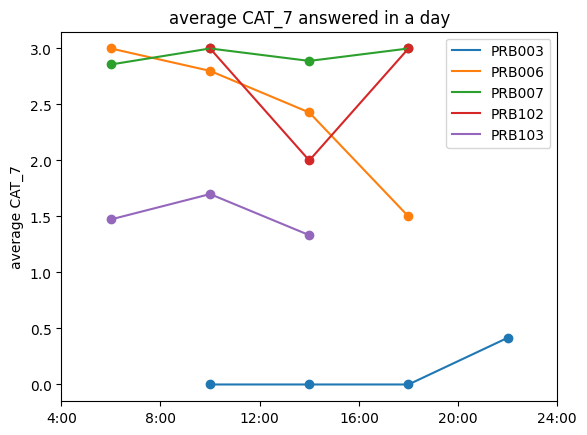

In [13]:
l = {}
for id in CAT_id:
    l[id] = []
    for t in range(6):
        df = df_CAT[df_CAT.index.str.startswith(id)]
        l[id].append(df[(df['timestamp'].dt.hour >= t*4) & (df['timestamp'].dt.hour <= t*4+4)].CAT_7.mean())
    plt.scatter(range(6), l[id])
    plt.plot(range(6), l[id], label=id)
plt.xticks([i+0.5 for i in range(6)], ['4:00', '8:00', '12:00', '16:00', '20:00', '24:00'])
plt.ylabel('average CAT_7')
plt.title('average CAT_7 answered in a day')
plt.legend()
plt.show()

In [5]:
# More than 4 hours of recordings is considered valid recordings at night
def valid_night_time(group):
    group = group.reset_index()
    return len(group[(group['timestamp'].dt.hour >= 22) | (group['timestamp'].dt.hour < 7)]) >= (4*60*2)

# Average sleeping hours per day
def average_sleep_hrs(group):
    if len(group) >= (4*60*2):
        return group['isSleep'].sum() / 120
    else:
        return np.nan

# sleep efficiency at night
# sleeping hours at night / night time
def sleep_efficiency_night(group):
    if valid_night_time:
        group = group.reset_index()
        group = group[(group['timestamp'].dt.hour >= 22) | (group['timestamp'].dt.hour < 7)]
        return group['isSleep'].sum() / len(group)
    else:
        return np.nan

# sleeping hours at night / overall sleeping hours
def sleep_percentage_night(group):
    if valid_night_time:
        sleep = group[group.isSleep == 1]
        if len(sleep) == 0:
            return np.nan
        group = group.reset_index()
        night = group[(group['timestamp'].dt.hour >= 22) | (group['timestamp'].dt.hour < 7)]
        return len(night) / len(sleep)
    else:
        return np.nan

# Number of short awakenings (>2 min, <=20), removed head and tail
def short_awakenings(group):
    sleep = group[group.isSleep == 1]
    if len(sleep) == 0:
        return np.nan
    group = group.reset_index()
    group['wake_group'] = (group['isAwake'] != group['isAwake'].shift()).cumsum()
    group['wake_duration'] = group.groupby(['wake_group'])['isAwake'].sum()
    return len(group[(group['wake_duration'] > 4) & (group['wake_duration'] <= 20)]) / len(sleep)

# Number of position changes
def position_changes(group):
    sleep = group[group.isSleep == 1][group.final_class != 11]
    if len(sleep) == 0:
        return np.nan
#     awakenings = (group['isAwake'] != group['isAwake'].shift()).sum()
    return ((sleep['final_class'] != sleep['final_class'].shift()).sum() - 1) / len(sleep)

In [14]:
# PSQI for all subjects
matrix = ['average_sleep_hrs', 'sleep_efficiency_night', 'sleep_percentage_night', 'short_awakenings', 'position_changes']
PSQI = pd.DataFrame(columns=matrix)
for id in ids:
    df = df_dict[id]
    df_sub = pd.DataFrame(index=df.date.unique())
    df_sub['average_sleep_hrs'] = df.groupby("date").apply(average_sleep_hrs)
    df_sub['sleep_efficiency_night'] = df.groupby("date").apply(sleep_efficiency_night)
    df_sub['sleep_percentage_night'] = df.groupby("date").apply(sleep_percentage_night)
    df_sub['short_awakenings'] = df.groupby("date").apply(short_awakenings)
    df_sub['position_changes'] = df.groupby("date").apply(position_changes)
    df_sub['id'] = id
    PSQI = pd.concat([PSQI, df_sub])

PSQI

,average_sleep_hrs,sleep_efficiency_night,sleep_percentage_night,short_awakenings,position_changes,id
2021-07-07,NaN,NaN,0.000000,0.750000,0.333333,PRB001
2021-07-08,1.333333,NaN,0.000000,0.156250,0.013889,PRB001
2021-07-09,NaN,NaN,0.000000,0.333333,NaN,PRB001
2021-07-10,NaN,NaN,0.000000,1.000000,NaN,PRB001
2021-07-13,NaN,NaN,0.000000,0.400000,0.000000,PRB001
...,...,...,...,...,...,...
2021-11-15,5.433333,0.648760,0.742331,0.079755,0.078358,PRX900
2021-11-16,4.375000,0.842697,1.186667,0.003810,0.080000,PRX900
2021-11-17,6.591667,0.709677,0.352718,0.046776,0.012285,PRX900
2021-11-18,8.083333,0.790049,0.849485,0.032990,0.021563,PRX900


In [15]:
PSQI_id = pd.DataFrame(columns=matrix)
PSQI_id = PSQI.groupby('id').mean()
PSQI_id

,average_sleep_hrs,sleep_efficiency_night,sleep_percentage_night,short_awakenings,position_changes
id,,,,,
PRB001,3.164931,0.675579,0.353192,0.229961,0.074304
PRB003,5.698413,0.586923,0.807294,0.117709,0.087892
PRB005,3.271500,0.620088,0.455161,0.222846,0.079729
PRB006,6.928125,0.754976,0.922418,0.059003,0.097238
PRB007,6.188542,0.650104,0.409610,0.069831,0.105494
PRB102,2.935632,0.255341,0.205782,0.202239,0.091028
PRB103,3.707121,0.617154,0.573753,0.102718,0.059851
PRB104,6.481481,0.878327,0.594551,0.037415,0.065063
PRB105,6.586068,0.773294,1.642550,0.076480,0.106416


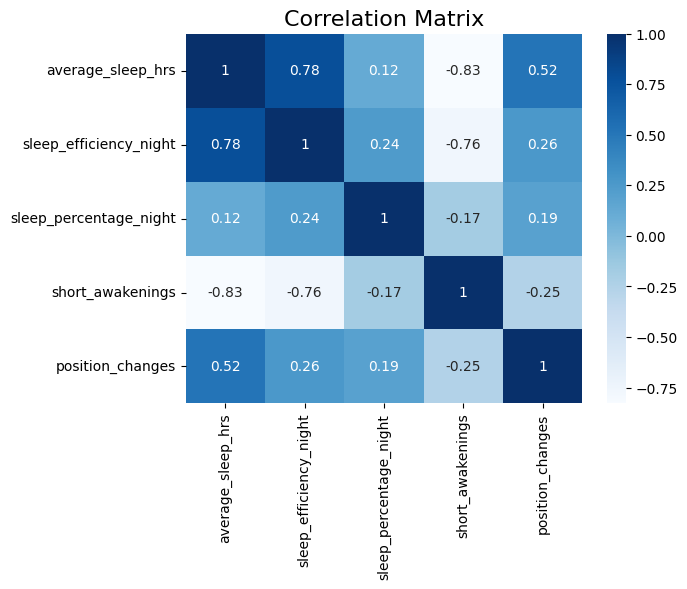

In [16]:
corr = PSQI_id.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [17]:
PSQI_new = PSQI_id.copy()
PSQI_new.short_awakenings = - PSQI_new.short_awakenings

pg.cronbach_alpha(data=PSQI_new)

(0.19766983397411717, array([-0.619,  0.671]))

In [18]:
PSQI_new = PSQI_id.copy()
PSQI_new.short_awakenings = - PSQI_new.short_awakenings
# PSQI_new.position_changes = - PSQI_new.position_changes

# Normalize data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(PSQI_new.values)
PSQI_new = pd.DataFrame(x_scaled, columns=matrix)
print(pg.cronbach_alpha(data=PSQI_new))
PSQI_new

(0.7799771678276713, array([0.556, 0.91 ]))


,average_sleep_hrs,sleep_efficiency_night,sleep_percentage_night,short_awakenings,position_changes
0,0.059557,0.583838,0.102598,0.224554,0.281329
1,0.294086,0.460668,0.418656,0.604094,0.493955
2,0.069422,0.506745,0.173569,0.248609,0.366220
3,0.407922,0.694145,0.498783,0.802587,0.640207
4,0.339458,0.548446,0.141865,0.765975,0.769409
5,0.038331,0.000000,0.000000,0.318285,0.543036
6,0.109749,0.502669,0.256110,0.654782,0.055150
7,0.366576,0.865517,0.270586,0.875581,0.136718
8,0.376258,0.719594,1.000000,0.743494,0.783834
9,0.000000,0.250011,0.405590,0.000000,0.287438


In [19]:
max_alpha = 0
best_weight = [1, 1, 1, 1, 1]

r = np.arange(0.05, 0.95, 0.05)
for i1 in r:
    for i2 in r:
        for i3 in r:
            for i4 in r:
                for i5 in r:
                    if i1 + i2 + i3 + i4 + i5 == 1:
                        weights = [i1, i2, i3, i4, i5]
                        weighted_df = PSQI_new.multiply(weights)
                        alpha = pg.cronbach_alpha(data=weighted_df)[0]
                        if alpha > max_alpha:
                            max_alpha = alpha
                            best_weight = weights

max_alpha, best_weight

(0.8081378137466433, [0.25, 0.25, 0.1, 0.25, 0.15000000000000002])

In [20]:
weights = [0.25, 0.25, 0.15, 0.2, 0.15]
weighted_df = PSQI_new.multiply(weights)
pg.cronbach_alpha(data=weighted_df)

(0.8067678580397173, array([0.61 , 0.921]))

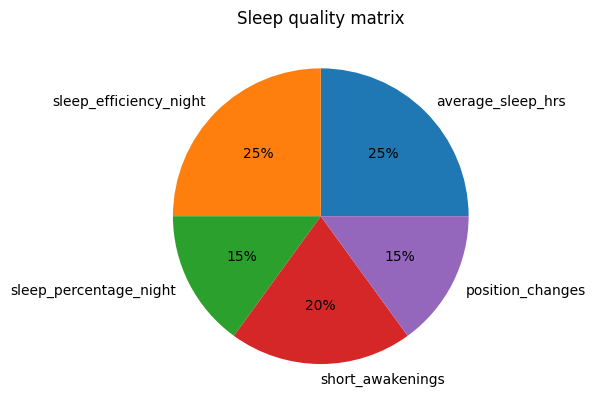

In [21]:
plt.pie(weights, labels=matrix, autopct='%1.0f%%')
plt.title('Sleep quality matrix')
plt.show()

In [22]:
PSQI_new = PSQI.copy()

def score(df):
    return 100*(1 - df.average_sleep_hrs*0.25 
                  - df.sleep_efficiency_night*0.25 
                  - df.sleep_percentage_night*0.15
                  + df.short_awakenings*0.2 
                  - df.position_changes*0.15)

PSQI_new['score'] = score(PSQI)
PSQI_new['score'] = min_max_scaler.fit_transform(PSQI_new[['score']]) * 5

PSQI_new = PSQI_new.reset_index()
PSQI_new = pd.merge(PSQI_new, df_CAT[['id','date', 'CAT_7']], how='left', left_on=['id','index'], right_on = ['id','date'])
PSQI_new = PSQI_new[PSQI_new['score'].notna()].drop('date', axis=1).rename(columns={'index': 'date'})
PSQI_new

,date,average_sleep_hrs,sleep_efficiency_night,sleep_percentage_night,short_awakenings,position_changes,id,score,CAT_7
14,2021-07-23,1.850000,0.776316,1.027027,0.108108,0.000000,PRB001,4.350793,NaN
15,2021-07-24,2.291667,0.618454,1.458182,0.061818,0.097561,PRB001,4.183270,NaN
16,2021-07-25,2.125000,0.688034,0.917647,0.043137,0.082569,PRB001,4.292348,NaN
17,2021-07-26,6.316667,0.775213,1.085752,0.026385,0.006154,PRB001,3.150981,NaN
20,2021-07-29,1.891667,0.555891,1.458150,0.074890,0.071429,PRB001,4.311582,NaN
...,...,...,...,...,...,...,...,...,...
957,2021-11-15,5.433333,0.648760,0.742331,0.079755,0.078358,PRX900,3.470033,NaN
958,2021-11-16,4.375000,0.842697,1.186667,0.003810,0.080000,PRX900,3.610773,NaN
959,2021-11-17,6.591667,0.709677,0.352718,0.046776,0.012285,PRX900,3.214778,NaN
960,2021-11-18,8.083333,0.790049,0.849485,0.032990,0.021563,PRX900,2.719429,NaN


In [23]:
PSQI_new.to_csv('results/NHS/df_scores.csv', index=False)

In [ ]:
PSQI_extra = pd.DataFrame(columns=['average_sleep_hrs', 'sleep_efficiency_night', 'short_awakenings', 'position_changes', 'records', 
                             'Lying on back', 'Lying on left side', 'Lying on right side', 'Lying on stomach'])
for id in ids:
    df = df_dict[id]
    PSQI_extra.loc[id] = [average_date(df), sleep_efficiency_night(df), short_awakenings(df), positions_change(df), len(df), 
                   len(df[df["final_class"] == 3]), len(df[df["final_class"] == 4]), 
                    len(df[df["final_class"] == 5]), len(df[df["final_class"] == 6])]

PSQI_extra

In [ ]:
PSQI_extra = PSQI_new[matrix + ['score', 'id']].groupby('id').mean()
PSQI_extra

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 8))
fig.suptitle('Sleep-quality matrix')
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)

ax1.bar(PSQI_extra.index, PSQI_extra.average_sleep_hrs, color=colors, alpha=0.8)
ax1.set_title("average sleeping hours per day (hrs)")

ax2.bar(PSQI_extra.index, PSQI_extra.sleep_efficiency_night, color=colors, alpha=0.8)
ax2.set_title("sleep efficiency at night (%)")
ax2.set_ylim(0, 100)

ax4.bar(PSQI_extra.index, PSQI_extra.short_awakenings, color=colors, alpha=0.8)
ax4.set_title("short awakenings >= 5min (#)")

ax5.bar(PSQI_extra.index, PSQI_extra.position_changes, color=colors, alpha=0.8)
ax5.set_title("position changes (#)")

df_CAT.boxplot(column='CAT_7',by='id', ax=ax3, patch_artist=True)
ax3.set_title("CAT sleeplessness")
ax3.set_xlabel('')

ax6.bar(PSQI_extra.index, PSQI_extra.score, color=colors, edgecolor ='black')
ax6.set_title("Sleep-quality scores")

plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize =(10, 5)) 
barWidth = 0.2
br1 = np.arange(6) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
lyings = ['Lying on back', 'Lying on left side', 'Lying on right side', 'Lying on stomach']
brs = [br1, br2, br3, br4]

for i, l in enumerate(lyings):
    plt.bar(brs[i], PSQI_extra[l], color =ACTIVITY_COLOR[l], width = barWidth, 
            edgecolor ='grey', label=l) 

ax1.set_xticks(np.linspace(0.3, 5.3, num=6), CAT_id)
ax1.legend()

ax2 = ax1.twinx()
ax2.scatter(np.linspace(0.3, 5.3, num=6), PSQI_extra.score, marker='*', color='red', label='sleep-quality score', s=100)
ax2.scatter(np.linspace(0.3, 5.3, num=6), PSQI_extra.CAT_7, marker='+', color='blue', label='CAT sleeplessness', s=100)
ax2.legend(loc='upper left')

plt.title("# of lying positions")
plt.grid()
plt.show()

In [ ]:
PSQI_new[PSQI_new.id == 'PRB006']

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 8))
ax1.bar(PSQI_006.index, PSQI_006.average_date, alpha=0.5, label='average sleeping hrs per day')
ax1.bar(PSQI_006.index, PSQI_006.sleep_efficiency_night, alpha=0.5, label='sleep efficiency')
ax1.bar(PSQI_006.index, PSQI_006.short_awakenings, alpha=0.5, label='number of awakenings')
ax1.bar(PSQI_006.index, PSQI_006.position_changes, alpha=0.5, label='position changes')
ax1.scatter(PSQI_006.index, PSQI_006.CAT_7, marker='*', color='red')
plt.legend()
plt.show()

In [ ]:
cronbach_alpha(PSQI_006)

In [ ]:
def matrix_plot(id):
    df = PSQI_new[PSQI_new.id == id]

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 8))
    fig.suptitle(f'Sleep-quality matrix for {id}', fontsize=16)
    cmap = plt.cm.tab10
    colors = cmap(np.arange(len(df)) % cmap.N)

    ax1.bar(df.index, df.average_sleep_hrs, color=colors, alpha=0.8)
    # ax1.scatter(df.index, df.CAT_7, marker='*', color='red')
    ax1.set_title("average sleeping hours per day (hrs)")

    ax2.bar(df.index, df.sleep_efficiency_night, color=colors, alpha=0.8)
    ax2.set_title("sleep efficiency at night (%)")
    ax2.set_ylim(0, 100)

    ax4.bar(df.index, df.short_awakenings, color=colors, alpha=0.8)
    ax4.set_title("short awakenings <= 20min (#)")

    ax5.bar(df.index, df.positions_change, color=colors, alpha=0.8)
    ax5.set_title("positions changes (#)")

    ax3.scatter(df.index, df.CAT_7, marker='*', color='red')
    ax3.set_title("CAT sleeplessness")

    ax6.bar(df.index, df.score, color=colors, edgecolor ='black')
    ax6.set_title("Sleep-quality scores")

    plt.show()

In [ ]:
matrix_plot('PRB006')